## BME i9400
## Fall 2024
### Optimization Theory

## Unconstrained Optimization
Optimization theory is the study of problems in which we want to find the best solution according to some criteria. It plays a crucial role in various fields, especially in machine learning, where we aim to optimize the performance of models.

**Example**
Consider a simple quadratic function:
$$ f(x) = ax^2 + bx + c $$

Our goal is to find the value of $x$ that minimizes $f(x)$. This is a classic example of a minimization problem.


## Finding the minimum of a function
To find the minimum of a function, we look for points where the derivative is zero. The derivative of the function gives us the slope, and at the minimum, this slope will be zero.

For our example:
$$ f'(x) = 2ax + b $$

Setting the derivative to zero to find the critical points:
$$ 2ax + b = 0 $$
$$ x = -\frac{b}{2a} $$

This is the value of $ x $ that minimizes $ f(x) $ if $ a > 0 $.

In optimization, we often use the **arg min** notation to represent the value of $ x $ that minimizes a function:
$$ \text{argmin}_x \ f(x) $$


## Demonstrating scalar optimization in Python
Below is a simple demonstration of how to find the minimum of a quadratic function in Python

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') # set plot style to five-thirty-eight

# Define the quadratic function
def f(x):
    a = 1
    b = -3
    c = 2
    return a * x**2 + b * x + c

# Generate values for x
x = np.linspace(-2, 4, 400)
y = f(x)

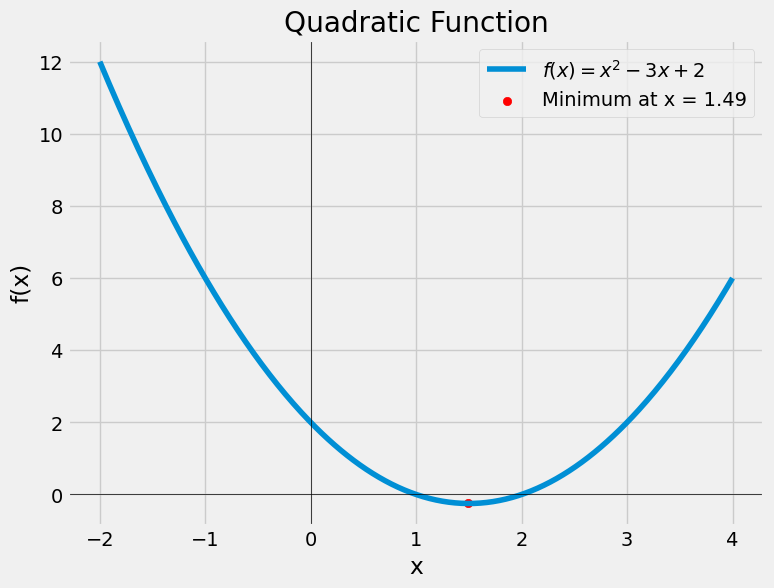

In [2]:
# Generate the derivative of the function
dy = np.diff(y)

# find the element of dy closest to zero
min_index = np.argmin(np.abs(dy))
min_x = x[min_index]

# Plot the function
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='$f(x) = x^2 - 3x + 2$')

# overlay the minimum point
plt.scatter(min_x, f(min_x), color='red', label=f'Minimum at x = {min_x:.2f}')

plt.title('Quadratic Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True)
plt.legend()
plt.show()

## Second Derivative Test
The sign of the coefficient $ a $ in the quadratic function determines whether the critical point is a minimum or a maximum:
- If $ a > 0 $, the parabola opens upwards, and the critical point is a minimum.
- If $ a < 0 $, the parabola opens downwards, and the critical point is a maximum.

To determine the nature of the critical point, we use the **second derivative test**:
- Take the second derivative of the function:
  $$ f''(x) = 2a $$
- If $ f''(x) > 0 $, the function is concave up, and the critical point is a minimum.
- If $ f''(x) < 0 $, the function is concave down, and the critical point is a maximum.


## Multivariate Optimization
In many real-world problems, we deal with functions of multiple variables. When we want to minimize a scalar-valued function of a vector, we use the **gradient**.

The gradient of a function \( f(x) \) where \( x \) is a vector is the vector of partial derivatives:
$$ \nabla f(x) = \left[ \frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2}, \ldots, \frac{\partial f}{\partial x_n} \right] $$

The gradient points in the direction of the steepest ascent. To find the minimum, we move in the opposite direction of the gradient.


## Minimizing a scalar function of a vector
Consider the quadratic function of a vector:
$$ f(x) = x^T A x + b^T x + c $$

To find the minimum, we take the gradient and set it to zero:
$$ \nabla f(x) = 2Ax + b = 0 $$
$$ x = -\frac{1}{2}A^{-1}b $$

This is the closed-form solution for the minimum of this quadratic function.


## Demonstrating vector optimization in Python
Below is a simple demonstration of how to find the minimum of a quadratic function of a vector in Python.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the quadratic function
def f(x):
    A = np.array([[2, 0], [0, 1]])
    b = np.array([2, -3])
    return x.T @ A @ x + b.T @ x

# Generate a grid of values for x and y
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
Z = np.array([[f(np.array([x, y])) for x in x] for y in y])

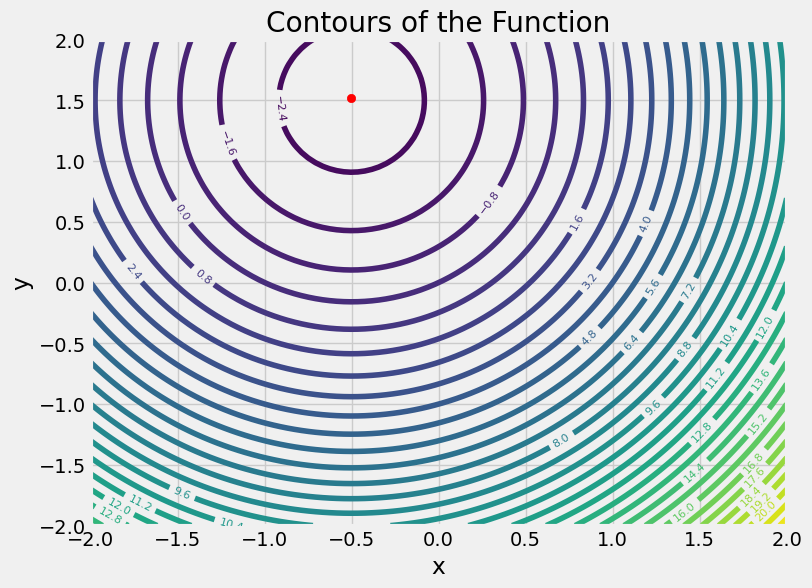

In [4]:
# Plot the contours of the function
plt.figure(figsize=(8, 6))
contour = plt.contour(X, Y, Z, levels=40)
plt.clabel(contour, inline=True, fontsize=8)
plt.title('Contours of the Function')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

# numerically compute the gradient of Z
dx = np.gradient(Z, axis=0)
dy = np.gradient(Z, axis=1)

# find the element of dx and dy closest to zero
min_index = np.unravel_index(np.argmin(np.abs(dx) + np.abs(dy)), dx.shape)
min_x, min_y = x[min_index[1]], y[min_index[0]]

# overlay the minimum point
plt.scatter(min_x, min_y, color='red', label=f'Minimum at (x, y) = ({min_x:.2f}, {min_y:.2f})')

## Constrained Optimization
In many optimization problems, we have constraints that the solution must satisfy. These problems are known as **constrained optimization problems**.

A generic constrained optimization problem can be written as:
$$ \text{minimize } f(x) $$
$$ \text{subject to } h_j(x) = 0, \quad j = 1, \ldots, p  $$

Where:
- $f(x)$ is the objective function.
- $h_j(x)$ are the equality constraints.
- $x$is the vector of variables to be optimized.
- $p$ is the number of constraints.

We can solve these problems using various methods, including the method of **Lagrange multipliers**.


## Lagrange Multipliers
The method of **Lagrange multipliers** helps us solve optimization problems with equality constraints.

We define the **Lagrangian**:
$$ \mathcal{L}(x, \lambda) = f(x) + \lambda^T g(x) $$

Where:
- $f(x)$ is the function we want to minimize.
- $g(x)$ is the constraint $g(x) = 0 $.
- $\lambda$ are the Lagrange multipliers.

**Steps to use Lagrange multipliers**:
1. Form the Lagrangian.
2. Take partial derivatives of the Lagrangian with respect to $ x $ and $\lambda$.
3. Set these derivatives to zero to find the critical points.
4. Solve the resulting system of equations.


## Example of minimizing a quadratic function with a linear constraint
Consider the quadratic function with a linear constraint:
$$ f(x) = x^T A x $$
Subject to:
$$ d^T x = c $$

The Lagrangian is:
$$ \mathcal{L}(x, \lambda) = x^T A x + \lambda (d^T x - c) $$

Taking partial derivatives and setting to zero:
$$ \nabla_x \mathcal{L} = 2Ax + \lambda d = 0 $$
$$ \nabla_\lambda \mathcal{L} = d^T x - c = 0 $$

Solve for $ x $:
$$ x = -\frac{1}{2} A^{-1} \lambda d $$
$$ d^T A^{-1} d \lambda = -2c $$
$$ \lambda = \frac{-2c}{d^T A^{-1} d} $$

Substitute the value of $ \lambda $ back to find $ x $.
$$ x = -\frac{1}{2} A^{-1} \left( \frac{-2c}{d^T A^{-1} d} \right) d $$
$$ x = c  \left( \frac{A^{-1} d}{d^T A^{-1} d} \right)  $$


## Demonstrating the method of Lagrange multipliers in Python

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function and the constraint
def f(x):
    A = np.array([[2, 0], [0, 1]])
    return x.T @ A @ x

def g(x):
    return 2*x[0] - x[1] - 1

# Generate values for x and y
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
Z = np.array([[f(np.array([x, y])) for x in x] for y in y])

# Compute the constraint
G = np.array([[g(np.array([x, y])) for x in x] for y in y])

A = np.array([[2, 0], [0, 1]])
d = np.array([2, -1])
c = 1

x_opt = c * np.linalg.inv(A)@d / (d.T @ np.linalg.inv(A) @ d)

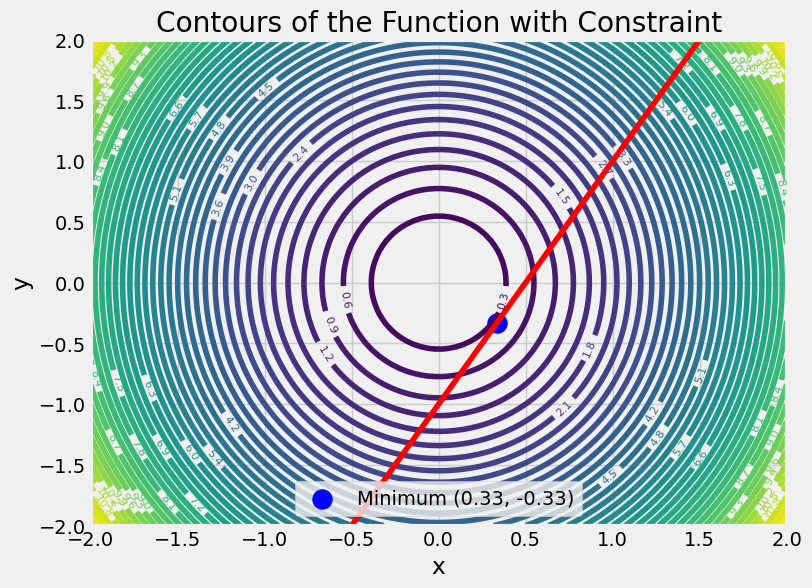

In [6]:
# Plot the contours of the function and the constraint
plt.figure(figsize=(8, 6))
contour = plt.contour(X, Y, Z, levels=40, cmap='viridis')
plt.clabel(contour, inline=True, fontsize=8)
plt.contour(X, Y, G, levels=[0], colors='red')
plt.title('Contours of the Function with Constraint')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

plt.scatter(x_opt[0], x_opt[1], 200 , color='blue', label=f'Minimum ({x_opt[0]:.2f}, {x_opt[1]:.2f})')
plt.legend()
plt.show()


## Motivation for gradient descent
In many real-world optimization problems, we cannot find a closed-form solution like we did in the examples above. Even if are able to compute an expression for the gradient, finding the value of the function that leads to a zero-valued gradient may not be possible.

In such cases, we use *iterative* methods to find the minimum. This means that we start with an initial guess and update it iteratively until we reach the minimum. This is where **gradient descent** comes in.

## Gradient Descent
We know that the gradient points in the direction of the steepest ascent. To find the minimum, we move in the opposite direction of the gradient. This is the idea behind **gradient descent**.

Gradient descent is the backbone of the primary algorithm used to train neural networks, namely backpropagation.

Consider a function $ f(x) $ that we want to minimize with respect to vector $x$. For convenience, let us define the gradient function by $g(x) = \nabla f(x)$. The function $g$ accepts a vector input $x$ and returns a second output vector $g(x)$ that points in the direction of steepest ascent.


The gradient descent algorithm is as follows:

1. Start with an initial guess for the optimal value $x_o$.
2. Compute the gradient at the initial point: $g(x_o)$.
3. Set the new value of $x$ as:
$x_1 = x_o - \mu \frac{g(x_o)}{\| g(x_o) \|}$,
where $\mu$ is the step size.
4. Check for convergence by measuring the difference between the new and old values:
$\| x_1 - x_o \| < \epsilon$.
If the difference is less than a predefined threshold $\epsilon \approx 10^{-6}$, stop; otherwise, repeat steps 2-4 with $x_1$ as the new initial point.


## Step size considerations
The step size $\mu$ is a crucial parameter in the gradient descent algorithm. It determines how far we move in the direction of the gradient at each step. If the step size is too small, the algorithm may converge very slowly. If it is too large, the algorithm may overshoot the minimum and diverge.

The step size may be set to an optimal value at each iteration. However, in practice, a fixed step size is often used for simplicity.

In [7]:
# Demonstrating gradient descent of a quadratic function in 2D
import numpy as np
import matplotlib.pyplot as plt

# Define the function and its gradient
A = np.array([[2, 0.5], [0.5, 1]])
b = np.array([2, -3])
c = 0

def f(x):
    return x.T @ A @ x + b.T @ x + c

def grad_f(x):
    return 2*A @ x + b


In [8]:
# Gradient descent algorithm
def gradient_descent(f, grad_f, x0, mu=0.1, epsilon=1e-6, max_iter=1000):
    x = x0
    history = [x0]
    for i in range(max_iter):
        grad = grad_f(x)
        x_new = x - mu * grad
        history.append(x_new)
        if np.linalg.norm(x_new - x) < epsilon:
            break
        x = x_new

    optval = f(x)

    return x, optval, np.array(history)


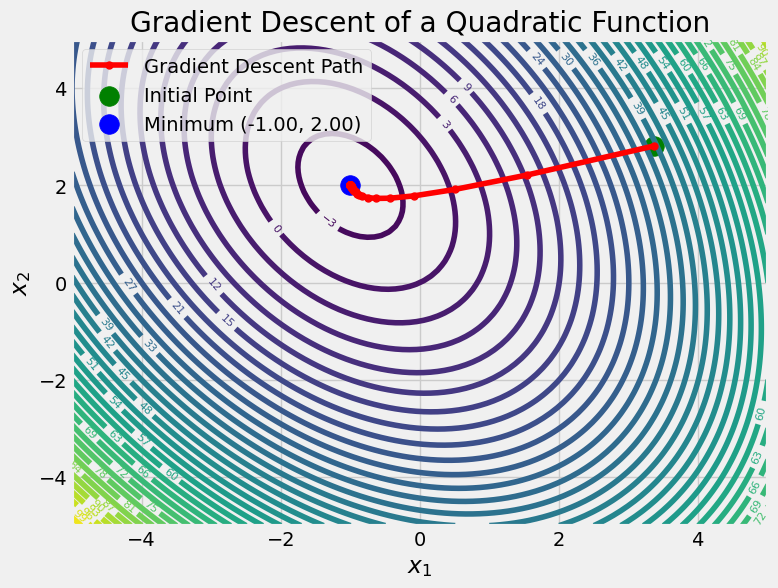

In [9]:
# Run the gradient descent algorithm with a randomly selected starting point
x0 = 5*np.random.rand(2)
x_opt, optval, history = gradient_descent(f, grad_f, x0)

# Plot the function and the path taken by gradient descent
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = np.array([[f(np.array([x, y])) for x in x] for y in y])

plt.figure(figsize=(8, 6))
contour = plt.contour(X, Y, Z, levels=40, cmap='viridis')

# Plot the path taken by gradient descent
plt.plot(history[:, 0], history[:, 1], color='red', marker='o', markersize=5, label='Gradient Descent Path')

plt.clabel(contour, inline=True, fontsize=8)
plt.title('Gradient Descent of a Quadratic Function')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid(True)

# plot initial point
plt.scatter(x0[0], x0[1], 200 , color='green', label='Initial Point')

plt.scatter(x_opt[0], x_opt[1], 200 , color='blue', label=f'Minimum ({x_opt[0]:.2f}, {x_opt[1]:.2f})')
plt.legend()
plt.show()